In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import torch.nn.functional as F

%matplotlib inline

In [2]:
n_dim = 2

In [3]:
x_train, y_train = make_blobs(
    n_samples=80,
    n_features=n_dim,
    centers = [
        [1,1],
        [-1,-1],
        [1,-1],
        [-1,1]
    ],
    shuffle=True,
    cluster_std=0.3
)

x_test, y_test = make_blobs(
    n_samples=20,
    n_features=n_dim,
    centers = [
        [1,1],
        [-1,-1],
        [1,-1],
        [-1,1]
    ],
    shuffle=True,
    cluster_std=0.3
)

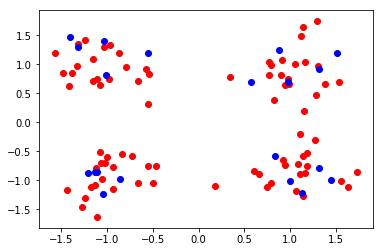

In [13]:
plt.scatter(x_train[:,0], x_train[:,1], color='red')
plt.scatter(x_test[:,0], x_test[:,1], color='blue')

plt.show()

In [14]:
def label_map(y_, from_, to_):
    """예제에서 4개의 레이블을 2개로, 0,1 -> 0, 2,3 -> 1"""
    y = np.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

In [15]:
y_train = label_map(y_train, [0,1], 0)
y_train = label_map(y_train, [2,3], 1)
y_test = label_map(y_test, [0,1], 0)
y_test = label_map(y_test, [2,3], 1)

In [17]:
def vis_data(x,y = None, c='r'):
    if y is None:
        y = [None] * len(x)
    for x_ , y_ in zip(x, y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
        else:

            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

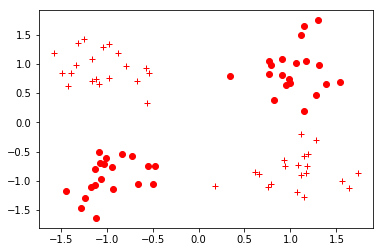

In [18]:
plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [19]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [22]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [24]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()

epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [26]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print("Before Training, test loss is {}".format(test_loss_before.item()))

Before Training, test loss is 0.6821425557136536


In [31]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    
    if epoch % 100 == 0:
        print("Train loss at {} is {}".format(epoch, train_loss.item()))
    
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6891281008720398
Train loss at 100 is 0.6625805497169495
Train loss at 200 is 0.6007413268089294
Train loss at 300 is 0.5026346445083618
Train loss at 400 is 0.38800087571144104
Train loss at 500 is 0.2841093838214874
Train loss at 600 is 0.20594072341918945
Train loss at 700 is 0.15338543057441711
Train loss at 800 is 0.11909130960702896
Train loss at 900 is 0.09608760476112366
Train loss at 1000 is 0.07998634874820709
Train loss at 1100 is 0.06828414648771286
Train loss at 1200 is 0.05946018546819687
Train loss at 1300 is 0.05260790139436722
Train loss at 1400 is 0.047156233340501785
Train loss at 1500 is 0.04272140562534332
Train loss at 1600 is 0.03904446214437485
Train loss at 1700 is 0.03594820946455002
Train loss at 1800 is 0.03330710530281067
Train loss at 1900 is 0.03102697990834713


In [32]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test)
print("After Training, test loss is {}".format(test_loss.item()))

After Training, test loss is 0.009065598249435425


In [33]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.3517, -1.5019],
        [-1.4498, -1.3390],
        [ 1.2708,  1.6871],
        [-0.7497,  0.7368],
        [-1.3480,  1.5433]])), ('linear_1.bias', tensor([ 0.0576,  0.1054,  0.0096, -0.1275, -0.0772])), ('linear_2.weight', tensor([[ 1.9533, -1.8466, -2.0294,  0.8218,  1.9432]])), ('linear_2.bias', tensor([-0.0597]))])


In [34]:
# load test
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

In [49]:
new_model.eval()
print("label 1 probability of vector [-1, -1] is {}".format(new_model(torch.tensor([-1.,-1.])).item()))


label 1 probability of vector [-1, -1] is 0.006704254075884819
